In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from IPython.display import clear_output

Using TensorFlow backend.


In [2]:
import os
os.getcwd()

'C:\\Users\\Lorenzo\\Desktop\\personale\\14.KU Leuven\\duties\\code_translation_module_3'

In [3]:
#load mnist data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
# validate dimension
print(f'x_train:{x_train.shape}, y_train:{y_train.shape}, x_test:{x_test.shape}, y_test:{y_test.shape}')

x_train:(60000, 28, 28), y_train:(60000,), x_test:(10000, 28, 28), y_test:(10000,)


In [5]:
# stop at the first matrix "in the dimension depth"
x_train[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

The image data (28x28) is flattened into a vector of length 784:

In [6]:
# reshape x_train(flatten the tensor as ANN takes vector data as input)
vec_x_train = tf.reshape(x_train, shape = [x_train.shape[0], x_train.shape[1]*x_train.shape[1]])
proto_tensor = tf.make_tensor_proto(vec_x_train)
arr_vec_x_train = tf.make_ndarray(proto_tensor)/255

In the following matrix, each row corresponds to one (flattened) image:

In [7]:
vec_x_train #tf.Tensor object

<tf.Tensor: id=2, shape=(60000, 784), dtype=uint8, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)>

In [8]:
arr_vec_x_train #np.array object

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Image values in train_x vector have been normalized:

In [9]:
print(f'min:{np.min(arr_vec_x_train)}, max:{np.max(arr_vec_x_train)}')

min:0.0, max:1.0


In [10]:
# reshape x_test(flatten the tensor as ANN takes vector data as input)
vec_x_test = tf.reshape(x_test, shape = [x_test.shape[0],x_test.shape[1]*x_test.shape[1]])
proto_tensor = tf.make_tensor_proto(vec_x_test)
arr_vec_x_test = tf.make_ndarray(proto_tensor)/255

In [11]:
vec_x_test #tf.Tensor object

<tf.Tensor: id=5, shape=(10000, 784), dtype=uint8, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)>

In [12]:
arr_vec_x_test #np.array object

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Image values in test_x vector have been normalized:

In [13]:
print(f'min:{np.min(arr_vec_x_test)}, max:{np.max(arr_vec_x_test)}')

min:0.0, max:1.0


We point out that we are dealing with a multi-class classification problem - elements must be classified in 10 categories:

In [14]:
# Unique elements in y_train and y_test vectors
print(f'unique y_train:{np.unique(y_train)}, unique y_test:{np.unique(y_test)}')

unique y_train:[0 1 2 3 4 5 6 7 8 9], unique y_test:[0 1 2 3 4 5 6 7 8 9]


We construct 10 dummy variables (0-9) for the output of the model:

In [15]:
# y_train
output = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [16]:
# y_test
test_output = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [17]:
# let's highlight the shape of the newly created np.array objects
print(f'shape of output:{output.shape}, shape of test_output:{test_output.shape}')

shape of output:(60000, 10), shape of test_output:(10000, 10)


We extract one row from the matrix arr_vec_x_train, we reshape it to (28x28) pixel format so that we can easily print it:

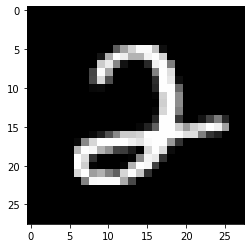

In [18]:
index = 16
pixels = arr_vec_x_train[index].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

The procedure to fit the dense neural network is initialized:

In [19]:
# instantiate model object
model = tf.keras.models.Sequential()

In [20]:
# neural network structure - adding first layer (Dense-type, fully connected)
model.add(tf.keras.layers.Dense(units = 16, activation = 'sigmoid', input_shape = (784,)))

In [21]:
# neural networdk structure - adding output layer (Dense-type, fully connected)
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

In [22]:
# compiling the model
model.compile(optimizer = 'RMSprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [24]:
# fit the model
model.fit(arr_vec_x_train, 
          output, 
          batch_size = 128, 
          epochs = 10, 
          validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 27us/sample - loss: 1.3383 - accuracy: 0.7300 - val_loss: 0.8052 - val_accuracy: 0.8541
Epoch 2/10
48000/48000 [==============================] - 1s 14us/sample - loss: 0.6299 - accuracy: 0.8719 - val_loss: 0.4647 - val_accuracy: 0.8973
Epoch 3/10
48000/48000 [==============================] - 1s 15us/sample - loss: 0.4237 - accuracy: 0.8990 - val_loss: 0.3533 - val_accuracy: 0.9111
Epoch 4/10
48000/48000 [==============================] - 1s 15us/sample - loss: 0.3452 - accuracy: 0.9091 - val_loss: 0.3070 - val_accuracy: 0.9158
Epoch 5/10
48000/48000 [==============================] - 1s 15us/sample - loss: 0.3057 - accuracy: 0.9160 - val_loss: 0.2819 - val_accuracy: 0.9197
Epoch 6/10
48000/48000 [==============================] - 1s 14us/sample - loss: 0.2816 - accuracy: 0.9213 - val_loss: 0.2654 - val_accuracy: 0.9248
Epoch 7/10
48000/48000 [==============================] 

##### printing part is missing here

In [25]:
test_loss, test_accuracy = model.evaluate(arr_vec_x_test, test_output)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [40]:
# prediction
prediction = np.round(model.predict(arr_vec_x_test),3)

In [41]:
prediction[0] # first row

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.994, 0.   ,
       0.005], dtype=float32)

In [42]:
# prediction vs actual
predicted_category = np.argmax(prediction, axis = 1)
actual_category = np.argmax(test_output, axis = 1)

In [43]:
# mis-predicted values
mask = np.equal(predicted_category,actual_category)
index_mispred = np.where(~mask)

The number of mis-predicted values is:

In [66]:
(~mask).sum()

687

In [67]:
def plot_img(vector_picture, actual_v, predited_v):
    pixels = vector_picture.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.title(f'actual:{actual_category[wrong]}, predicted:{predicted_category[wrong]}')
    plt.show()

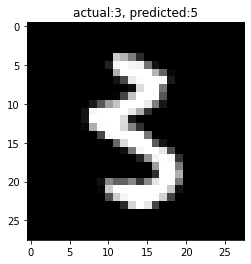

In [68]:
# example of mis-predicted values
wrong = index_mispred[0][35]
ex = arr_vec_x_test[wrong]
plot_img(ex, actual_category, predicted_category)

In [115]:
prediction[np.arange(prediction.shape[0]), actual_category]

array([0.994, 0.99 , 0.992, ..., 0.981, 0.791, 0.997], dtype=float32)